In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/CoLeaf DATASET'
img_size = 200

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2,
    )

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=10,
    class_mode='categorical',
    subset='training',
    seed = 125,
    shuffle=True)

train_validation = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=10,
    class_mode='categorical',
    subset='validation',
    seed = 125)

class_labels = train_generator.class_indices
category = list(class_labels.keys())
print(category)


Found 809 images belonging to 10 classes.
Found 197 images belonging to 10 classes.
['boron-B', 'calcium-Ca', 'healthy', 'iron-Fe', 'magnesium-Mg', 'manganese-Mn', 'more-deficiencies', 'nitrogen-N', 'phosphorus-P', 'potasium-K']


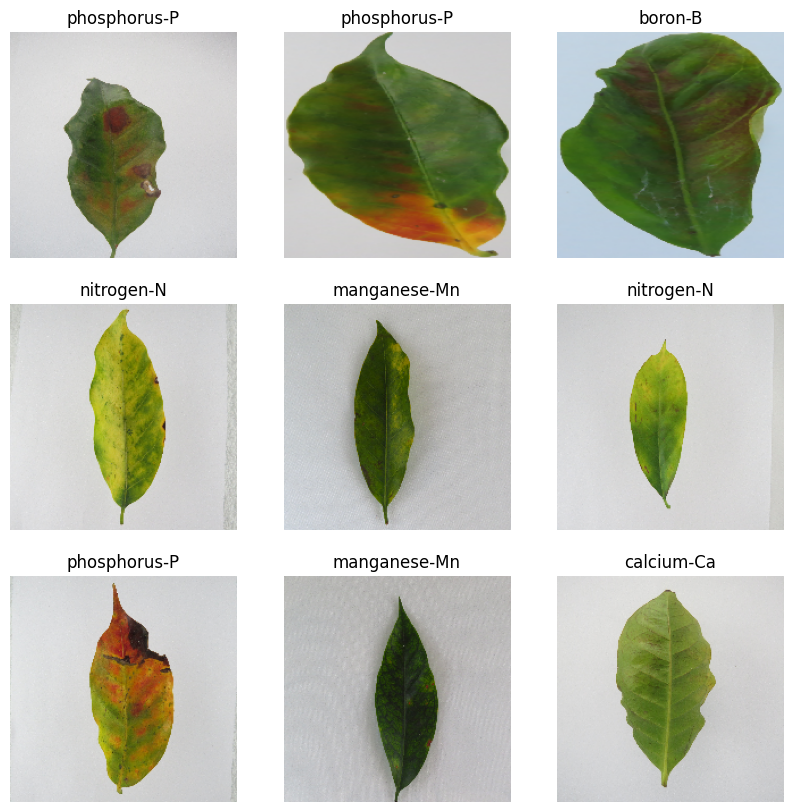

In [ ]:
import matplotlib.pyplot as plt

images_batch, labels_batch = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    image = images_batch[i]
    image = image * 255
    plt.imshow(image.astype('uint8'))
    label = category[labels_batch[i].argmax()]
    plt.title(label)
    plt.axis('off')

plt.show()


# Training Model

In [ ]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dropout(0.03)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [ ]:
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, validation_data=train_validation, epochs=15)


Epoch 1/15
81/81 [==============================] - 411s 5s/step - loss: 1.5938 - accuracy: 0.5105 - val_loss: 1.6454 - val_accuracy: 0.4721
Epoch 2/15
81/81 [==============================] - 101s 1s/step - loss: 0.9356 - accuracy: 0.6601 - val_loss: 1.6523 - val_accuracy: 0.4518
Epoch 3/15
81/81 [==============================] - 100s 1s/step - loss: 0.8299 - accuracy: 0.6996 - val_loss: 1.5862 - val_accuracy: 0.4518
Epoch 4/15
81/81 [==============================] - 100s 1s/step - loss: 0.6896 - accuracy: 0.7441 - val_loss: 1.5396 - val_accuracy: 0.5228
Epoch 5/15
81/81 [==============================] - 112s 1s/step - loss: 0.5962 - accuracy: 0.7899 - val_loss: 1.6056 - val_accuracy: 0.5533
Epoch 6/15
81/81 [==============================] - 103s 1s/step - loss: 0.5083 - accuracy: 0.8319 - val_loss: 1.6969 - val_accuracy: 0.4924
Epoch 7/15
81/81 [==============================] - 100s 1s/step - loss: 0.4454 - accuracy: 0.8393 - val_loss: 1.5956 - val_accuracy: 0.5381
Epoch 8/15
81

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


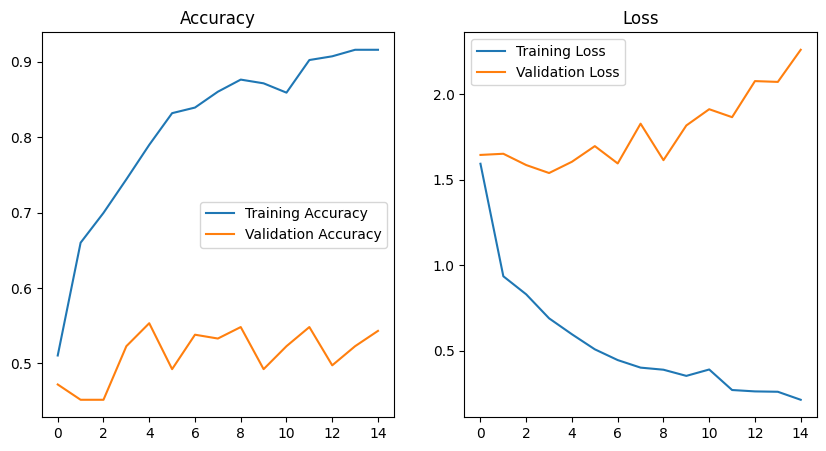

In [ ]:
epochs_range = range(15)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.legend()

In [ ]:
image = r"/content/drive/MyDrive/Colab Notebooks/CoLeaf DATASET/boron-B/B (1).jpg"
image = tf.keras.utils.load_img(image, target_size=(img_size, img_size))
img_arr = tf.keras.utils.array_to_img(image)
img_batch = tf.expand_dims(img_arr,0)

In [ ]:
import numpy as np
predict = model.predict(img_batch)
score = tf.nn.softmax(predict)
print('This is {} with accuracy of {:0.2f}%'.format(category[np.argmax(score)], np.max(score)*100))

1/1 [==============================] - 10s 10s/step
This is calcium-Ca with accuracy of 23.20%


In [ ]:
model.save('DenseNet.keras')